In [1]:
import os, sys
import pickle
sys.path.append("/Users/liuxing/Documents/git/python/python3/StereoSiTE")
from stereosite.plot import sankey, scii_circos, scii_net

## Sankey
Draw a sankey plot to visualize the core matrix.

In [2]:
#load core matrix
with open("./data/core.pickle", 'rb') as reader:
    core = pickle.load(reader)

In [3]:
#process core matrix to generate dataFrame that will be used to draw sankey plot.
core_df = sankey.core_process(core)

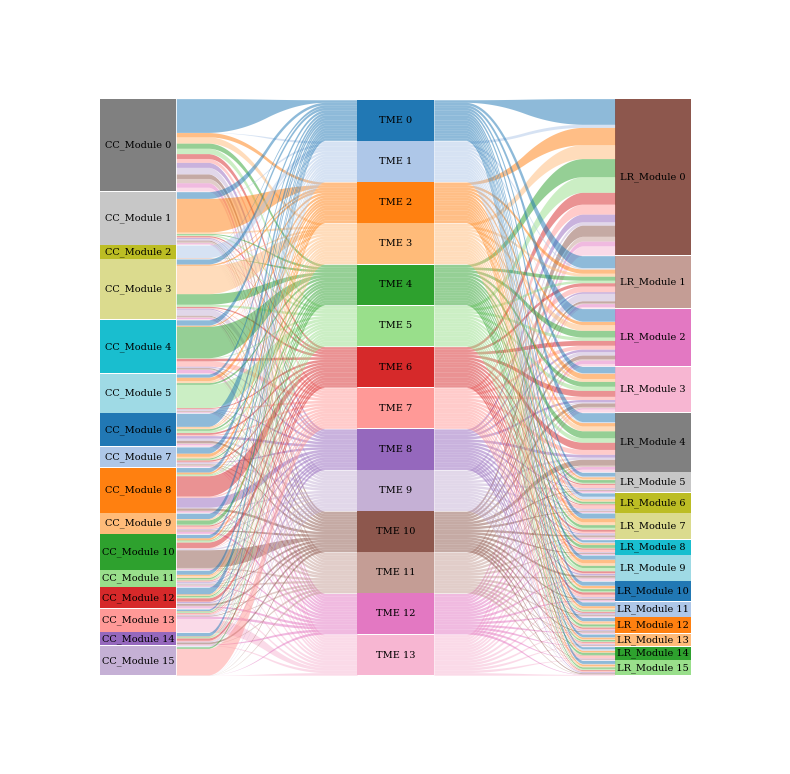

In [5]:

#draw sankey plot
sankey.sankey_3d(core_df, link_alpha=0.5, interval=0.001, save="./scii_tensor/sankey_3d.pdf")

## Heatmap of factor matrices
Draw heatmap plots to visualize factor matrices, including cell-cell module matrix and ligand-receptor module matrix.

In [6]:
#load factor matrices of cell-cell module, ligand-receptor module, and tme module
#load all scii_tensor matrix of every window/bin
with open("./data/factors.pickle", 'rb') as reader:
    factors = pickle.load(reader)
scii_tensor_file = "./data/lr_mt_list_filter.pickle"
with open(scii_tensor_file, 'rb') as reader:
    scii_matrices = pickle.load(reader)

In [7]:
#process factor matrices to generate dataframe
import pandas as pd
cc_index = scii_matrices[0].index
lr_index = scii_matrices[0].columns
factor_cc = pd.DataFrame(factors[0], index=cc_index)
factor_cc.columns = factor_cc.columns.map(lambda x: f"CC_Module {x}")
factor_lr = pd.DataFrame(factors[1], index=lr_index)
factor_lr.columns = factor_lr.columns.map(lambda x: f"LR_Module {x}")
factor_tme = pd.DataFrame(factors[2])
factor_tme.columns = factor_tme.columns.map(lambda x: f"TME {x}")

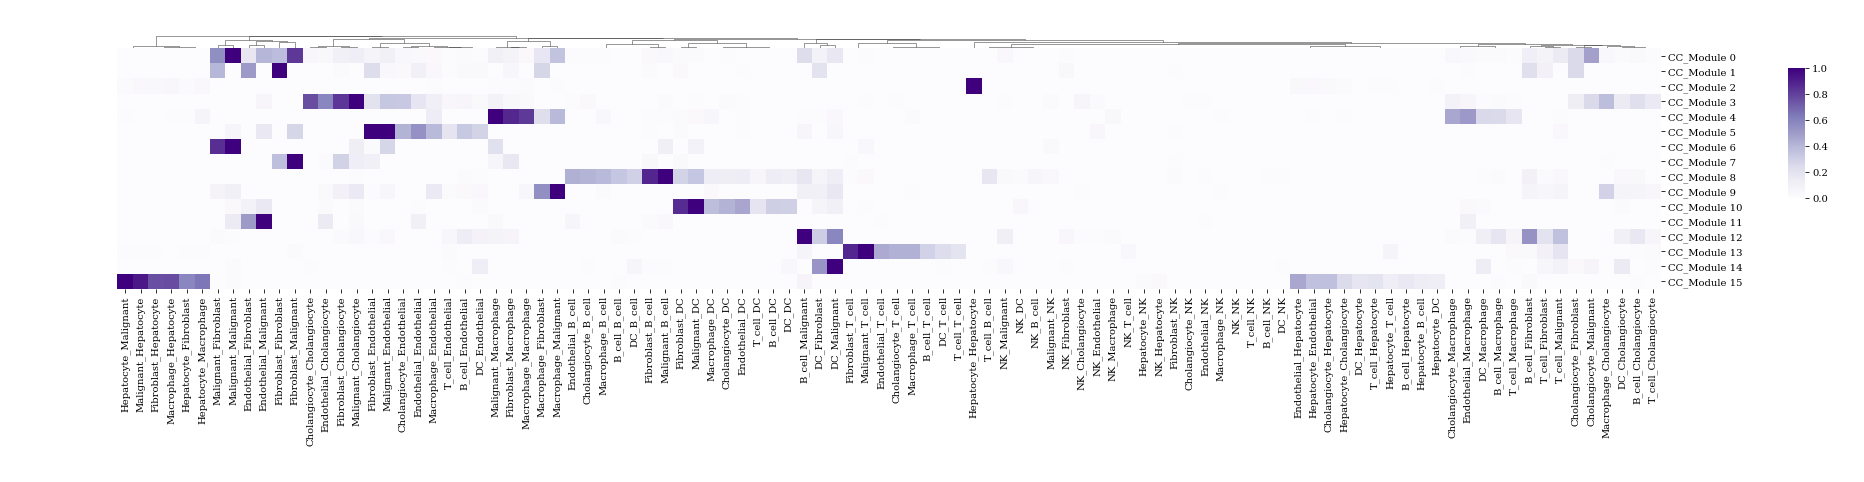

In [8]:
#draw the heatmap based on the cell-cell factor matrix
import seaborn as sns
import matplotlib.pyplot as plt
fig = sns.clustermap(factor_cc.T, cmap="Purples", standard_scale=0, metric='euclidean', method='ward', 
                     row_cluster=False, dendrogram_ratio=0.05, cbar_pos=(1.02, 0.6, 0.01, 0.3),
                     figsize=(24, 6),
                     )
fig.savefig("./scii_tensor/factor_cc_heatmap.pdf")

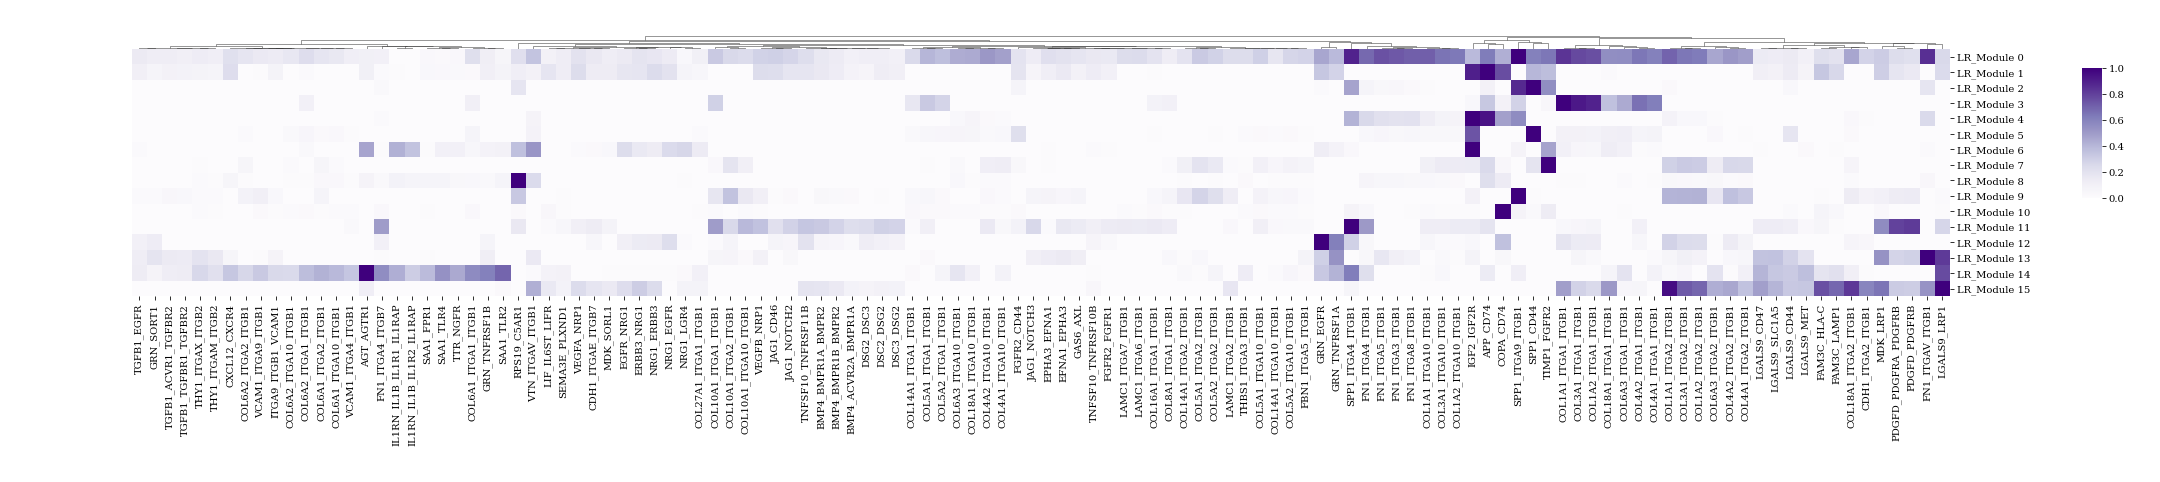

In [9]:
#select the top ligand-receptor pairs, then draw the heatmap based on ligan-receptor factor matrix
lr_number = 120 #number of ligand-receptor pairs on the top that will remain
factor_lr_top = factor_lr.loc[factor_lr.sum(axis=1).sort_values(ascending=False).index[0:lr_number]]
fig = sns.clustermap(factor_lr_top.T, cmap="Purples", standard_scale=0, metric='euclidean', method='ward', 
                     row_cluster=False, dendrogram_ratio=0.05, cbar_pos=(1.02, 0.6, 0.01, 0.3),
                     figsize=(28, 6),
                     )
fig.savefig("./scii_tensor/factor_lr_heatmap.pdf")

## Interaction selection
Select interactions in the TME region of interest. Only the top cell-cell pairs of a specific cell-cell module and the top ligand-receptor pairs of a specific ligand-receptor module remain.

In [10]:
interaction_matrix = scii_circos.interaction_select(scii_matrices, factor_cc, factor_lr, factor_tme, 
                               interest_TME='TME 7',
                               interest_cc_module='CC_Module 15',
                               interest_LR_module='LR_Module 14',
                               lr_number=20,
                               cc_number=10)

<Axes: >

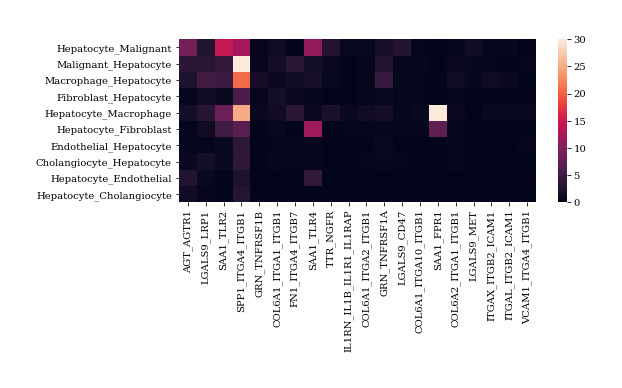

In [11]:
plt.figure(figsize=(8, 3))
sns.heatmap(interaction_matrix, vmax=30)

## Circos
Draw the circos plot to visualize the selected interaction matrix.

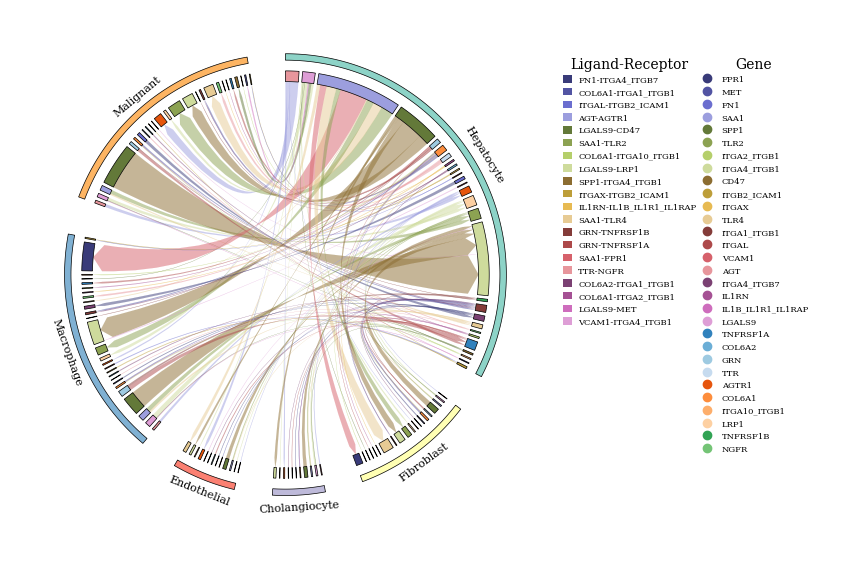

In [12]:
#Draw the circos diagram, which includes cell types, ligand-receptor genes, and the links between ligands and receptors.
cells = ['Hepatocyte', 'Fibroblast', 'Cholangiocyte', 'Endothelial', 'Macrophage', 'Malignant', 'B_cell', 'T_cell', 'DC', 'NK'] #list contains names of all cell types
scii_circos.cells_lr_circos(interaction_matrix, cells, save="./scii_tensor/cells_lr_circos.pdf")

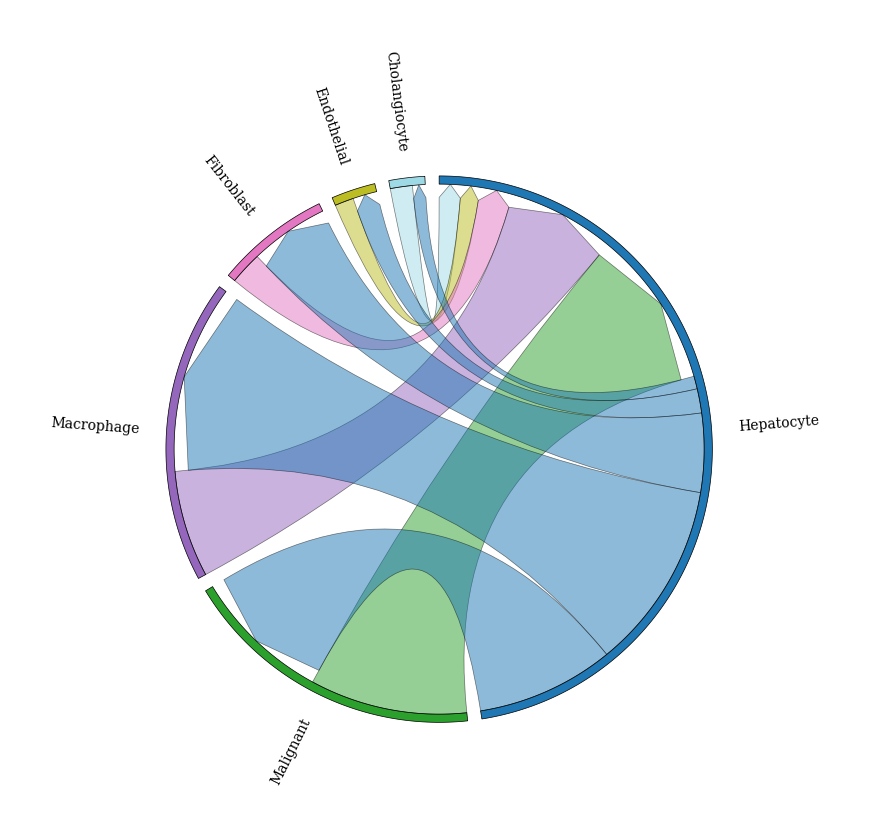

In [13]:
#Draw the circos which only contains cell types and the links between them.
scii_circos.cells_circos(interaction_matrix, cells, save="./scii_tensor/cells_circos.pdf")

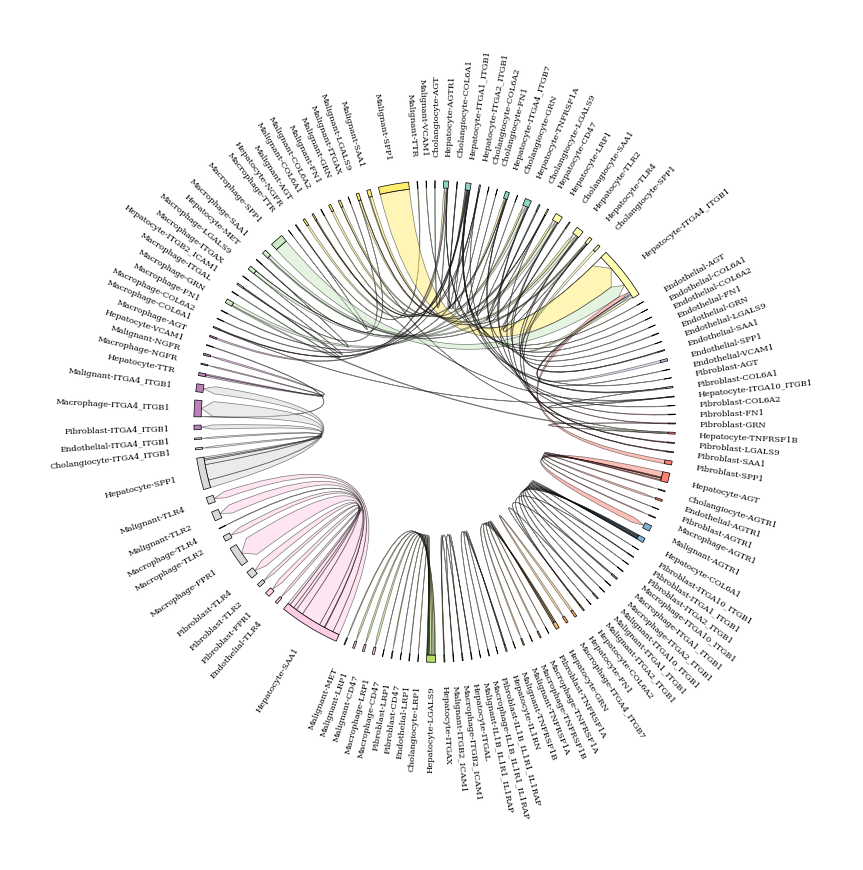

In [14]:
#Draw circos which only contains ligand-receptor genes
scii_circos.lr_circos(interaction_matrix, cells)

## Igraph
Draw a network diagram to visualize the interaction matrix.

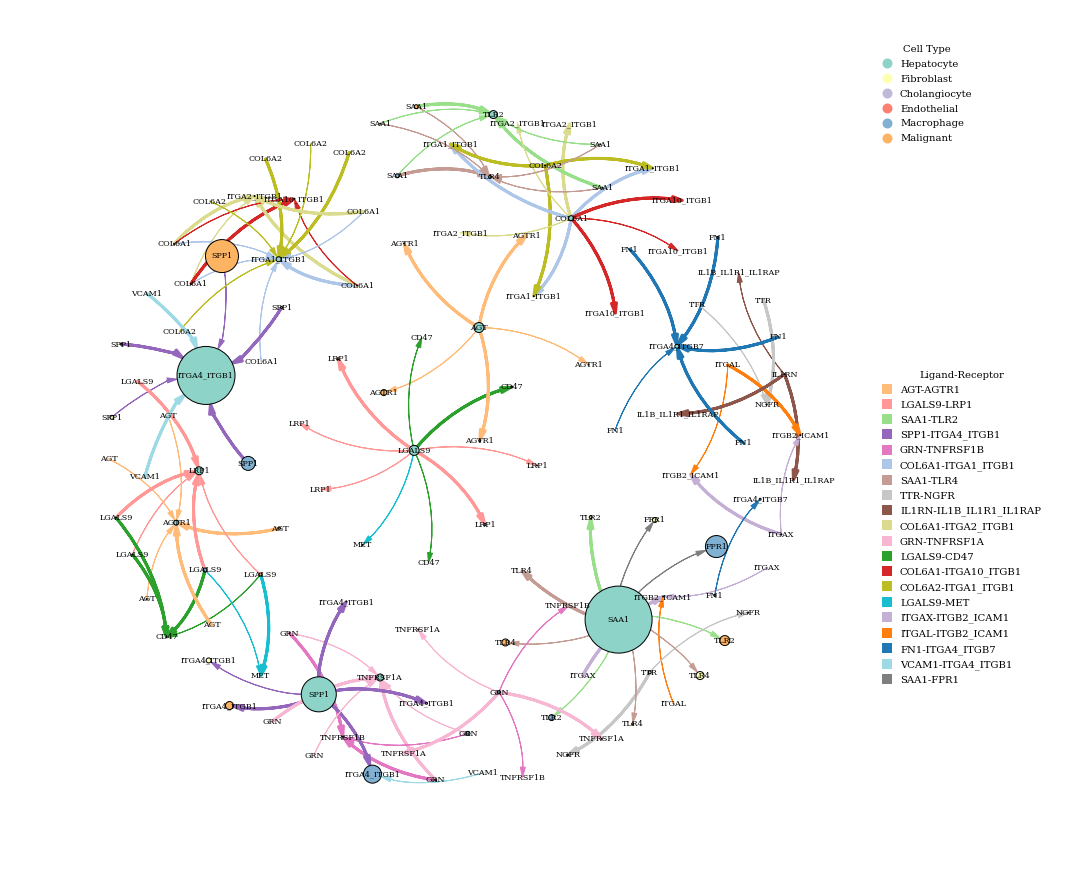

In [15]:
#Draw the network diagram based on the Graph generated previously.
scii_net.grap_plot(interaction_matrix, cells,
                   save="./scii_tensor/igrap_network.pdf")

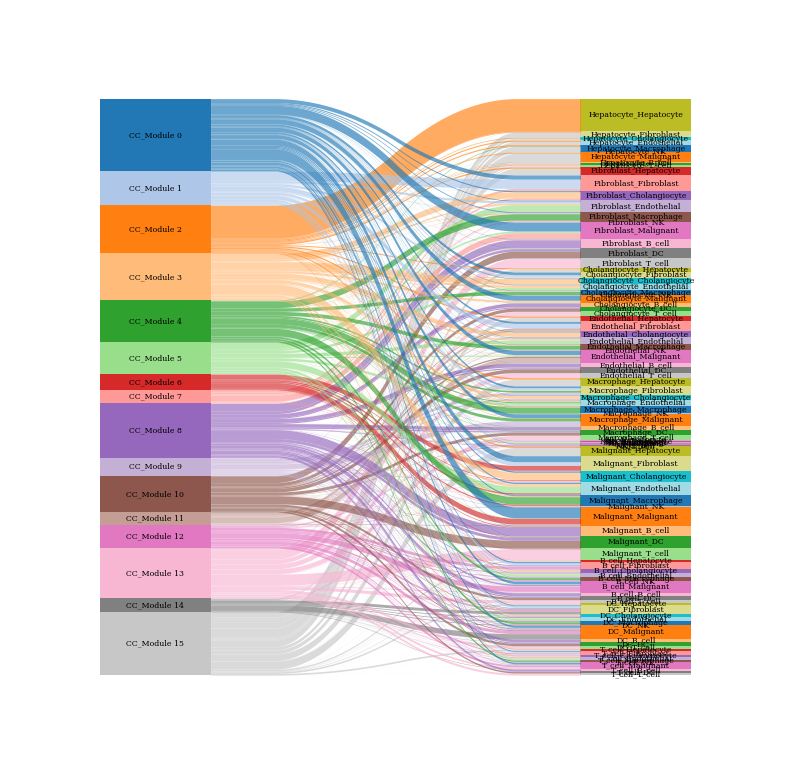

In [16]:
cc_df = sankey.factor_process(factors[0], cc_index)
sankey.sankey_2d(cc_df)